In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pymongo import MongoClient
import seaborn as sns
import re

In [2]:
try:
    mongo_client = MongoClient("mongodb+srv://<user>:<password>@okcupid.njnu4m5.mongodb.net/") #Update Your Code Here
    print("Connected to MongoDB Atlas")
except ServerSelectionTimeoutError as e:
    print(f"Error connecting to MongoDB Atlas: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

Connected to MongoDB Atlas


In [3]:
mongo_database = mongo_client.OKCupid
mongo_collection = mongo_database.OKCupid

In [4]:
all_documents = mongo_collection.find().limit(10)

In [5]:
for item in all_documents:
    print(item)

{'_id': ObjectId('66043c9f0d794818da3d5519'), 'age': 29, 'status': 'single', 'sex': 'm', 'orientation': 'straight', 'body_type': 'average', 'diet': 'mostly anything', 'drinks': 'socially', 'education': 'graduated from college/university', 'ethnicity': 'white', 'height': 67, 'income': -1, 'job': 'computer / hardware / software', 'last_online': '2012-06-29-19-18', 'location': 'san francisco, california', 'offspring': "doesn't have kids, but might want them", 'pets': 'likes cats', 'religion': 'atheism', 'sign': 'taurus', 'smokes': 'no', 'speaks': 'english (fluently), chinese (okay)', 'essay0': "i'm an australian living in san francisco, but don't hold that against me. i spend most of my days trying to build cool stuff for my company. i speak mandarin and have been known to bust out chinese songs at karaoke. i'm pretty cheeky. someone asked me if that meant something about my arse, which i find really funny.  i'm a little oddball. i have a wild imagination; i like to think of the most impr

In [6]:
pipeline = [
    {
        '$match': {
            '$and': [
                {'sex': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                {'age': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                
                # Essays
                {'$or': [
                    {'essay0': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay1': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay2': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay3': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay4': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay5': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay6': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay7': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay8': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}},
                    {'essay9': {'$exists': True, '$ne': None, '$ne': '', '$ne': 'null'}}
                ]}
            ]
        }
    },
    
    {
        '$project': {
            'sex': 1,
            'age': 1,
            'speaks': 1,
            'essay0': {'$cond': [{'$isArray': ['$essay0']}, {'$reduce': {'input': '$essay0', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay0', '']}}]},
            'essay1': {'$cond': [{'$isArray': ['$essay1']}, {'$reduce': {'input': '$essay1', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay1', '']}}]},
            'essay2': {'$cond': [{'$isArray': ['$essay2']}, {'$reduce': {'input': '$essay2', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay2', '']}}]},
            'essay3': {'$cond': [{'$isArray': ['$essay3']}, {'$reduce': {'input': '$essay3', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay3', '']}}]},
            'essay4': {'$cond': [{'$isArray': ['$essay4']}, {'$reduce': {'input': '$essay4', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay4', '']}}]},
            'essay5': {'$cond': [{'$isArray': ['$essay5']}, {'$reduce': {'input': '$essay5', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay5', '']}}]},
            'essay6': {'$cond': [{'$isArray': ['$essay6']}, {'$reduce': {'input': '$essay6', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay6', '']}}]},
            'essay7': {'$cond': [{'$isArray': ['$essay7']}, {'$reduce': {'input': '$essay7', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay7', '']}}]},
            'essay8': {'$cond': [{'$isArray': ['$essay8']}, {'$reduce': {'input': '$essay8', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay8', '']}}]},
            'essay9': {'$cond': [{'$isArray': ['$essay9']}, {'$reduce': {'input': '$essay9', 'initialValue': '', 'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}}, {'$toString': {'$ifNull': ['$essay9', '']}}]}
        }
    },
]

communication_result = list(mongo_database.OKCupid.aggregate(pipeline, allowDiskUse=True))
pipeline.pop()


{'$project': {'sex': 1,
  'age': 1,
  'speaks': 1,
  'essay0': {'$cond': [{'$isArray': ['$essay0']},
    {'$reduce': {'input': '$essay0',
      'initialValue': '',
      'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}},
    {'$toString': {'$ifNull': ['$essay0', '']}}]},
  'essay1': {'$cond': [{'$isArray': ['$essay1']},
    {'$reduce': {'input': '$essay1',
      'initialValue': '',
      'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}},
    {'$toString': {'$ifNull': ['$essay1', '']}}]},
  'essay2': {'$cond': [{'$isArray': ['$essay2']},
    {'$reduce': {'input': '$essay2',
      'initialValue': '',
      'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}},
    {'$toString': {'$ifNull': ['$essay2', '']}}]},
  'essay3': {'$cond': [{'$isArray': ['$essay3']},
    {'$reduce': {'input': '$essay3',
      'initialValue': '',
      'in': {'$concat': ['$$value', ' ', {'$toString': '$$this'}]}}},
    {'$toString': {'$ifNull': ['$essay3', '']}}]},
  'essay4': {

### Query-> The main goal of this analysis is to understand the characteristics and tendencies of the users. This will be done by examining the content of the essay5 and essay7 columns, as well as the users' demographic information like gender and age. The analysis has two key focuses: identifying users' relationship preferences, discerning whether they seek a serious commitment, a casual arrangement, or both, and understanding their weekend preferences. 

In [7]:
# Query to determine relationship preference

love_synonyms = ["romantic", "love", "true love", "affection", "passion", "adoration"]
casual_synonyms = ["casual", "casually", "fling", "non-committal", "unserious", "chill"]

love_regex_pattern = "|".join([re.escape(synonym) for synonym in love_synonyms])
casual_regex_pattern = "|".join([re.escape(synonym) for synonym in casual_synonyms])
combined_regex_pattern = f"({love_regex_pattern})|({casual_regex_pattern})"

love_pipeline = [
    {
        "$match": {
            "$or": [
                { "essay5": { "$regex": love_regex_pattern, "$options": "i" } }, 
            ],
            "sex": { "$ne": None, "$ne": "" }
        }
    },
    {
        "$group": {
            "_id": "$sex",
            "count": { "$sum": 1 }
        }
    }
]

casual_pipeline = [
    {
        "$match": {
            "$or": [
                { "essay5": { "$regex": casual_regex_pattern, "$options": "i" } },
            ],
            "sex": { "$ne": None, "$ne": "" }
        }
    },
    {
        "$group": {
            "_id": "$sex",
            "count": { "$sum": 1 }
        }
    }
]

mixed_pipeline = [
    {
        "$match": {
            "$or": [
                { "essay5": { "$regex": combined_regex_pattern, "$options": "i" } },
            ],
            "sex": { "$ne": None, "$ne": "" }
        }
    },
    {
        "$group": {
            "_id": "$sex",
            "count": { "$sum": 1 }
        }
    }
]

love_result = list(mongo_database.OKCupid.aggregate(love_pipeline, allowDiskUse=True))
casual_result = list(mongo_database.OKCupid.aggregate(casual_pipeline, allowDiskUse=True))
mixed_result = list(mongo_database.OKCupid.aggregate(mixed_pipeline, allowDiskUse=True))

for result in love_result:
    gender = result['_id']
    count = result['count']
    print(f"Gender: {gender}, Love Count: {count}")

for result in casual_result:
    gender = result['_id']
    count = result['count']
    print(f"Gender: {gender}, Casual Count: {count}")
    
for result in mixed_result:
    gender = result['_id']
    count = result['count']
    print(f"Gender: {gender}, Mixed Count: {count}")


Gender: m, Love Count: 4053
Gender: f, Love Count: 3956
Gender: f, Casual Count: 34
Gender: m, Casual Count: 58
Gender: f, Mixed Count: 3976
Gender: m, Mixed Count: 4101


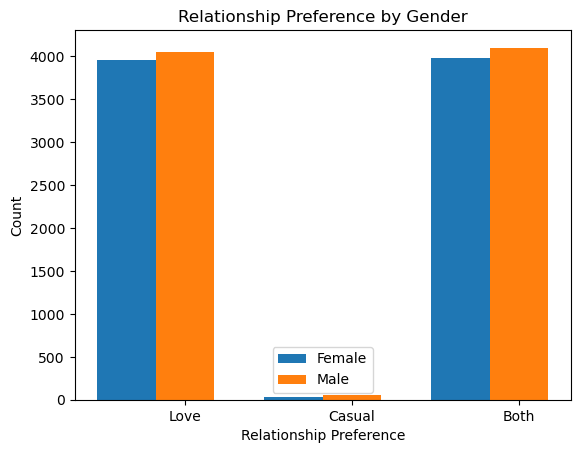

In [8]:
love_counts = {result['_id']: result['count'] for result in love_result}
casual_counts = {result['_id']: result['count'] for result in casual_result}
mixed_counts = {result['_id']: result['count'] for result in mixed_result}

genders = ['Female', 'Male']
relationship_preferences = ['Love', 'Casual', 'Both']

counts = {
    'Female': [love_counts.get('f', 0), casual_counts.get('f', 0), mixed_counts.get('f', 0)],
    'Male': [love_counts.get('m', 0), casual_counts.get('m', 0), mixed_counts.get('m', 0)]
}

# Plotting
bar_width = 0.35
index = range(len(relationship_preferences))

fig, ax = plt.subplots()

for i, gender in enumerate(genders):
    ax.bar([x + i * bar_width for x in index], counts[gender], bar_width, label=gender)

ax.set_xlabel('Relationship Preference')
ax.set_ylabel('Count')
ax.set_title('Relationship Preference by Gender')
ax.set_xticks([x + bar_width for x in index])
ax.set_xticklabels(relationship_preferences)
ax.legend()

plt.show()

### How user likes to spend their weekend?

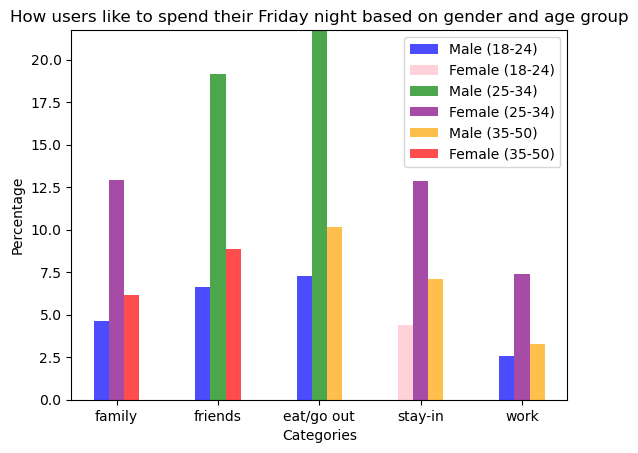

In [10]:
import re
import matplotlib.pyplot as plt

total_users_pipeline = [
    {
        "$group": {
            "_id": None,
            "total_users": { "$sum": 1 }
        }
    }
]

total_users_result = list(mongo_database.OKCupid.aggregate(total_users_pipeline))
total_users = total_users_result[0]['total_users'] if total_users_result else 0


age_groups = {
    "18-24": {"min": 18, "max": 24},
    "25-34": {"min": 25, "max": 34},
    "35-50": {"min": 35, "max": 50}
}

categories_synonyms = {
    "family": ["family", "kin", "relatives", "son", "daughter", "mom", "dad", "mother", "father", "fam", "children"],
    "friends": ["friends", "buddies", "mates", "roommates", "boys", "girls"],
    "eat/go out": ["eat", "go out", "dine", "restaurant", "outing", "out"],
    "stay-in": ["stay-in", "stay in", "home", "indoor", "sitting", "watching", "cooking"],
    "work": ["work", "working", "job", "hectic"]
}



categories_regex_patterns = {}
for category, synonyms in categories_synonyms.items():
    regex_pattern = "|".join([re.escape(synonym) for synonym in synonyms])
    categories_regex_patterns[category] = regex_pattern

categories_pipelines = {}
for category, regex_pattern in categories_regex_patterns.items():
    pipeline = [
        {
            "$match": {
                "essay7": { "$exists": True, "$ne": None, "$ne": "", "$type": "string" },
                "essay7": { "$regex": regex_pattern, "$options": "i" },
                "age": {"$gte": 18, "$lte": 50} 
            }
        },
        {
            "$group": {
                "_id": {
                    "$switch": {
                        "branches": [
                            {"case": {"$and": [{"$gte": ["$age", 18]}, {"$lte": ["$age", 24]}]}, "then": "18-24"},
                            {"case": {"$and": [{"$gte": ["$age", 25]}, {"$lte": ["$age", 34]}]}, "then": "25-34"},
                            {"case": {"$and": [{"$gte": ["$age", 35]}, {"$lte": ["$age", 50]}]}, "then": "35-50"}
                        ],
                        "default": "Other"
                    }
                },
                "sex": {"$first": "$sex"},
                "count": { "$sum": 1 }
            }
        }
    ]
    categories_pipelines[category] = pipeline

category_results = {}
for category, pipeline in categories_pipelines.items():
    result = list(mongo_database.OKCupid.aggregate(pipeline, allowDiskUse=True))
    category_results[category] = result

percentage_counts = {}
for category, result in category_results.items():
    percentage_counts[category] = {}
    for entry in result:
        age_group = entry['_id']
        gender = entry['sex']
        count = entry['count']
        if age_group not in percentage_counts[category]:
            percentage_counts[category][age_group] = {}
        percentage_counts[category][age_group][gender] = (count / total_users) * 100

categories = list(category_results.keys())
age_groups_labels = list(age_groups.keys())
male_percentages = {age_group: [percentage_counts[category].get(age_group, {}).get('m', 0) for category in categories] for age_group in age_groups_labels}
female_percentages = {age_group: [percentage_counts[category].get(age_group, {}).get('f', 0) for category in categories] for age_group in age_groups_labels}
female_percentages = {age_group: [percentage_counts[category].get(age_group, {}).get('f', 0) for category in categories] for age_group in age_groups_labels}

x = range(len(categories))

male_colors = ['blue', 'green', 'orange']
female_colors = ['pink', 'purple', 'red']

bar_width = 0.15
x_offsets = np.linspace(-0.15, 0.15, len(age_groups_labels))

for i, age_group_label in enumerate(age_groups_labels):
    x_age_group = [pos + x_offsets[i] for pos in range(len(categories))]
    
    plt.bar(x_age_group, male_percentages[age_group_label], width=bar_width, label=f'Male ({age_group_label})', color=male_colors[i], alpha=0.7)
    
    plt.bar(x_age_group, female_percentages[age_group_label], width=bar_width, bottom=male_percentages[age_group_label], label=f'Female ({age_group_label})', color=female_colors[i], alpha=0.7)

plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('How users like to spend their Friday night based on gender and age group')
plt.xticks(range(len(categories)), categories)
plt.legend()

plt.show()
